## 1.5 Fine Tuning

### 1.5.3 Dataset & DataLoader

1) Import packages

---



In [ ]:
# basic
import numpy as np
import os.path as osp
import sys
import matplotlib.pyplot as plt
from tqdm import tqdm

# pythorch
import torch  
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader 

# torchvision
import torchvision 
from torchvision import models,transforms

2) Load own class & function

In [ ]:
root_path = "/content/drive/MyDrive/ColabData/chap1"
utils_path = osp.join(root_path,'utils')
data_path = osp.join(root_path, 'data')

In [ ]:
!ls $root_path

data  hymenoptera_data	model  utils


In [ ]:
ls $utils_path

data.py


In [ ]:
# Add Path
sys.path.append(utils_path)

In [ ]:
from dataloader_IC import ImageTransform, make_datapath_list,HymenopteraDataset

In [ ]:
train_list = make_datapath_list(data_path, phase="train")
val_list = make_datapath_list(data_path, phase='val')

/content/drive/MyDrive/ColabData/chap1/data/hymenoptera_data/train/**/*.jpg
/content/drive/MyDrive/ColabData/chap1/data/hymenoptera_data/val/**/*.jpg


In [ ]:
size = 224
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)

train_dataset = HymenopteraDataset(
    file_list=train_list,
    transform=ImageTransform(size, mean, std),
    phase='train'
)
val_dataset = HymenopteraDataset(
    file_list=val_list,
    transform=ImageTransform(size, mean, std),
    phase='val'
)

In [ ]:
len(train_dataset)

243

In [ ]:
batch_size = 32

train_dataloader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True
)

val_dataloader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    shuffle=False
)

dataloaders_dict = {
    "train": train_dataloader,
    "val": val_dataloader
}

## 1.5.4. Define Network

In [ ]:
use_pretrained = True
net = models.vgg16(pretrained=use_pretrained)

net.classifier[6] = nn.Linear(in_features=4096, out_features=2)

net.train()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

## 1.5.5. Define Loss

In [ ]:
criterion = nn.CrossEntropyLoss()

## 1.5.6. Define Optimizer

In [ ]:
params_to_update_1 = []
params_to_update_2 = []
params_to_update_3 = []

update_param_names_1 = ["features"]
update_param_names_2 = [
    "classifier.0.weight",
    "classifier.0.bias",
    "classifier.3.weight",
    "classifier.3.bias",
]
update_param_names_3 = [
    "classifier.6.weight",
    "classifier.6.bias"
]

for name, param in net.named_parameters():
    if update_param_names_1[0] in name:
        param.requires_grad = True
        params_to_update_1.append(param)
        print("params_to_update_1에 저장: ", name)
    
    elif name in update_param_names_2:
        param.requires_grad=True
        params_to_update_2.append(param)
        print("params_to_update_2에 저장: ", name)
    
    elif name in update_param_names_3:
        param.requires_grad=True
        params_to_update_3.append(param)
        print("params_to_update_3에 저장: ", name)

    else:
        param.requires_grad=False
        print("경사 계산 없음. 학습하지 않음: ", name)

params_to_update_1에 저장:  features.0.weight
params_to_update_1에 저장:  features.0.bias
params_to_update_1에 저장:  features.2.weight
params_to_update_1에 저장:  features.2.bias
params_to_update_1에 저장:  features.5.weight
params_to_update_1에 저장:  features.5.bias
params_to_update_1에 저장:  features.7.weight
params_to_update_1에 저장:  features.7.bias
params_to_update_1에 저장:  features.10.weight
params_to_update_1에 저장:  features.10.bias
params_to_update_1에 저장:  features.12.weight
params_to_update_1에 저장:  features.12.bias
params_to_update_1에 저장:  features.14.weight
params_to_update_1에 저장:  features.14.bias
params_to_update_1에 저장:  features.17.weight
params_to_update_1에 저장:  features.17.bias
params_to_update_1에 저장:  features.19.weight
params_to_update_1에 저장:  features.19.bias
params_to_update_1에 저장:  features.21.weight
params_to_update_1에 저장:  features.21.bias
params_to_update_1에 저장:  features.24.weight
params_to_update_1에 저장:  features.24.bias
params_to_update_1에 저장:  features.26.weight
params_to_update_1

In [ ]:
# 이미 학습된 모델을 사용하여 안정성은 떨어져도 빠른 속도로 수렴하는 SGD를 사용한거 같음. 
optimizer = optim.SGD([
    {'params': params_to_update_1, 'lr': 1e-4},
    {'params': params_to_update_2, 'lr': 5e-4},
    {'params': params_to_update_3, 'lr': 1e-3},
], momentum=0.9)

## 1.5.7. Train & Validation

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
def train_model(net, dataloaders_dict, criterion, optimizer, num_epochs):
    net.to(device)

    # For Highperformance
    torch.backends.cudnn.benchmark = True

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('--------------')

        for phase in ['train', 'val']:
            if phase == 'train':
                net.train()
            else:
                net.eval()
            
            epoch_loss = 0.0
            epoch_corrects = 0

            if (epoch==0) and (phase=='train'): # 훈련 안된것의 성능을 보고 들어가겠다.
                continue
            
            for inputs, labels in tqdm(dataloaders_dict[phase]):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = net(inputs)
                    loss = criterion(outputs, labels)
                    _, preds = torch.max(outputs, 1)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                    
                    epoch_loss += loss.item() * inputs.size(0)
                    epoch_corrects += torch.sum(preds == labels.data)
            
            epoch_loss = epoch_loss / len(dataloaders_dict[phase].dataset)
            epoch_acc = epoch_corrects.double() / len(dataloaders_dict[phase].dataset)

            print(f'{phase} Loss: {epoch_loss:.4f} Acc:{epoch_acc:.4f}')


**`torch.backends.cudnn.benchmark=True`**

* 내장된 cudnn 자동 튜너를 활성화하여, 하드웨어에 맞게 사용할 최상의 알고리즘(텐서 크기나 conv 연산에 맞게?)을 찾는다.

* 입력 이미지 크기가 자주 변하지 않는다면, 초기 시간이 소요되지만 일반적으로 더 빠른 런타임의 효과를 볼 수 있다.

* 그러나, 입력 이미지 크기가 반복될 때마다 변경된다면 런타임성능이 오히려 저하될 수 있다.


In [ ]:
num_epochs = 2
train_model(net, dataloaders_dict, criterion, optimizer, num_epochs=num_epochs)

Epoch 1/2
--------------


100%|██████████| 5/5 [00:43<00:00,  8.79s/it]


val Loss: 0.9209 Acc:0.3725
Epoch 2/2
--------------


100%|██████████| 8/8 [01:11<00:00,  8.95s/it]


train Loss: 0.5728 Acc:0.6584


100%|██████████| 5/5 [00:03<00:00,  1.58it/s]

val Loss: 0.1647 Acc:0.9477


## 1.5.8 Save & Load

In [ ]:
model_path = osp.join(root_path,'model')

In [ ]:
save_path = osp.join(model_path, 'vgg_fine_tuning.pth')
torch.save(net.state_dict(), save_path)

In [ ]:
# Not trained VGG
net2 = models.vgg16(pretrained=False)
net2.classifier[6] = nn.Linear(in_features=4096, out_features=2)

load_weights = torch.load(save_path)
net2.load_state_dict(load_weights)

<All keys matched successfully>

In [ ]:
# GPU to CPU
load_weights = torch.load(save_path, map_location={'cuda:0': 'cpu'})
net2.load_state_dict(load_weights)

<All keys matched successfully>

In [ ]:
img,label = train_dataset[0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


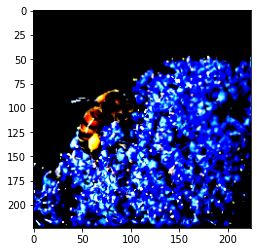

In [ ]:
plt.imshow(img.permute(1,2,0))
plt.show()

In [ ]:
label

1

In [ ]:
net2(img.unsqueeze(0))

tensor([[0.3378, 0.6574]], grad_fn=<AddmmBackward0>)

In [ ]:
_,pred = torch.max(net2(img.unsqueeze(0)),1)
if pred == 0 :
    print('Ant')
elif pred == 1:
    print('Bee')
else:
    print('Fail')

Bee
